In [1]:
import csv

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('Admission_Predict.csv')

In [6]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


<AxesSubplot:>

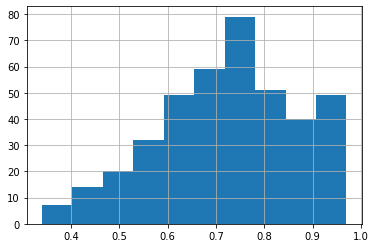

In [7]:
df['Chance of Admit '].hist()

In [8]:
df['Chance of Admit '].median()

0.73

In [9]:
df['Admit'] = df['Chance of Admit ']>0.73

In [10]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92,True
1,2,324,107,4,4.0,4.5,8.87,1,0.76,True
2,3,316,104,3,3.0,3.5,8.00,1,0.72,False
3,4,322,110,3,3.5,2.5,8.67,1,0.80,True
4,5,314,103,2,2.0,3.0,8.21,0,0.65,False
...,...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82,True
396,397,325,107,3,3.0,3.5,9.11,1,0.84,True
397,398,330,116,4,5.0,4.5,9.45,1,0.91,True
398,399,312,103,3,3.5,4.0,8.78,0,0.67,False


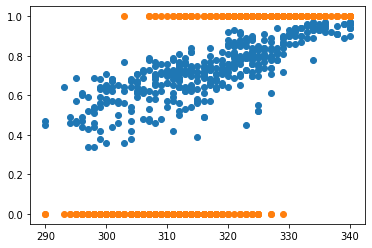

In [11]:
plt.scatter(df['GRE Score'],df['Chance of Admit '])
plt.scatter(df['GRE Score'],df['Admit'])

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [13]:
X = df['GRE Score'].to_numpy()[:,np.newaxis]
Y = df['Chance of Admit ']
Y = Y.values.reshape(-1, 1)

In [14]:
lr = LinearRegression()
LR = LogisticRegression()

In [15]:
lr.fit(X,Y)

LinearRegression()

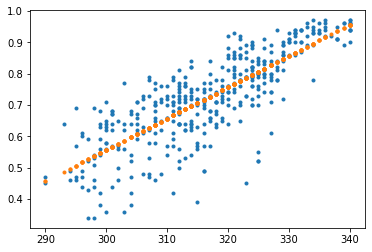

In [16]:
# This plot shows the nice linear regression fit between GRE score and Chance of admit

plt.plot(X,Y,'.')
plt.plot(X,lr.predict(X),'.')

In [17]:
#Instead of using linear regression now do logistic regression on target output classes of Admit
Y = df['Admit']
Y = Y.values

In [18]:
Y.shape

(400,)

In [19]:
LR.fit(X,Y)

LogisticRegression()

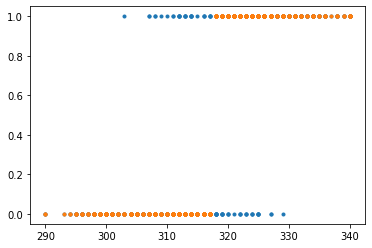

In [20]:
# this is the Logistic Regression prediction (along with ground truth)
plt.plot(X,Y,'.')
plt.plot(X,LR.predict(X),'.')

In [21]:
df.keys()

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ', 'Admit'],
      dtype='object')

### Q1
``` 
A. Use 4 features from above to set up your data matrix X. These 4 features should in your opinion best predict Admit decision (4 pts)
B. Split X, Y into train, val, test (2 pts) 
C. Scale and Augment X appropriately (4 pts)```

In [22]:
df = pd.read_csv('Admission_Predict.csv')
df['Chance of Admit '].median()
df['Admit'] = df['Chance of Admit ']>0.73

#define X as best (imo) 4 features except the target variable and the serial number (which is just an index)
X = df[['GRE Score','SOP','LOR ','CGPA']].to_numpy()
Y = df['Chance of Admit ']
Y = Y.values.reshape(-1, 1)

In [23]:
#split into training, validation, and test sets in the ratio 60:20:20
X_train = X[:240,:]
X_val = X[240:320,:]
X_test = X[320:,:]

Y_train = Y[:240,:]
Y_val = Y[240:320,:]
Y_test = Y[320:,:]


In [24]:
#scale the data and augment with a column of ones
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

#add a column of ones to the data
X_train = np.hstack((np.ones((X_train.shape[0],1)),X_train))
X_val = np.hstack((np.ones((X_val.shape[0],1)),X_val))
X_test = np.hstack((np.ones((X_test.shape[0],1)),X_test))

### Q2
``` Report cross entropy loss for a random prediction of Y_val and for predictions from LR.predict(X_val) (5 pts)```


0.69312718 and 0.69312718

The loss is the same for both predictions. This is because the predictions are random and the loss is the same for both predictions.

In [25]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [26]:
def compute_cross_entropy_loss(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

def predict(X, params):
    return np.round(sigmoid(X @ params))

print(compute_cross_entropy_loss(X_train, Y_train, np.zeros((5,1))))
Y_pred = predict(X_train, np.zeros((5,1)))
print(compute_cross_entropy_loss(X_train, Y_pred, np.zeros((5,1))))


[[0.69312718]]
[[0.69312718]]


In [27]:
def init(X,zeros=True):
    n = X.shape[1]
    if zeros:
        theta = np.zeros((n,1))
    else:
        theta = np.random.rand(n,1)-0.5
        theta[-1] = 0
    return theta

In [28]:
# This is batch gradient descent that updates using all training samples
def update_weights( X, Y,  theta ) :
             
        #Y_pred = predict(X, theta)  
        # calculate gradients  
        m = X.shape[0]
        dtheta = - ( 2 * ( X.T ).dot( Y - sigmoid(np.matmul(X,theta)) )  ) / m
        cost_history = compute_cross_entropy_loss(X, Y, theta)
        return dtheta,cost_history

### Q3 
``` Implement an iterative method that at each iterations selects a random theta and if this theta improves cross_entropy_loss keeps the theta, else discards the theta. plot the cross_entropy loss history (over iterations for X_val) with this method. (10 pts)```
### Bonus
``` Implement an iterative method that at each iterations gets a random *dtheta* and if  theta+learning_rate*dtheta improves cross_entropy_loss it updates  theta with dtheta, else discards dtheta. plot the cross_entropy loss history (over iterations for X_val) with this method. (10 pts)```

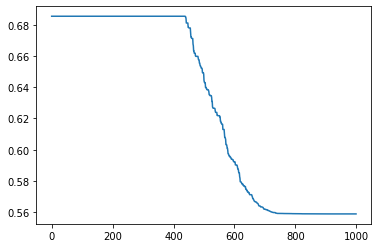

In [29]:
#implement an terative method that at each iterations selects a random theta and if this theta improves cross_entropy_loss keeps the theta, else discards the theta
def random_search(X, Y, theta):
    n_iter=1000
    learning_rate=0.01
    cost_history = np.zeros(n_iter)
    theta_history = np.zeros((n_iter,theta.shape[0]))
    theta_try = theta + learning_rate*np.random.randn(5,1)
    cost = compute_cross_entropy_loss(X, Y, theta_try)
    cost_history[0] = cost

    #iterate over the number of iterations and at each iteration generate a random theta and compute the cross entropy loss
    for it in range(1,n_iter):
        theta_try = theta + learning_rate*np.random.randn(5,1)
        cost = compute_cross_entropy_loss(X, Y, theta_try)

        #if the cost is less than the previous cost, then keep the new theta, else discard the new theta
        if (cost[0][0] < cost_history[it-1]):
            theta = theta_try
            cost_history[it] = cost
            theta_history[it,:] = theta.T
        else:
            cost_history[it] = cost_history[it-1]
            theta_history[it,:] = theta_history[it-1,:]

    #return the final theta and the history of theta and cost
    return theta, theta_history, cost_history

#print(random_search (X_train, Y_train, init(X_train)))

#plot the cross_entropy loss history (over iterations for X_val)
theta, theta_history, cost_history = random_search(X_val, Y_val, init(X_val))
plt.plot(cost_history)



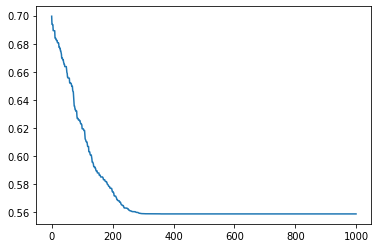

In [30]:
#implement an iterative method that at each iterations gets a random *dtheta* and if  theta+learning_rate*dtheta improves cross_entropy_loss it updates  
#theta with dtheta, else discards dtheta
def random_search2(X, Y, theta):
    n_iter=1000
    learning_rate=0.01
    cost_history = np.zeros(n_iter)
    theta_history = np.zeros((n_iter,theta.shape[0]))
    theta_try = theta + learning_rate*np.random.randn(5,1)
    cost = compute_cross_entropy_loss(X, Y, theta_try)
    cost_history[0] = cost

    #iterate over the number of iterations and at each iteration generate a random theta and compute the cross entropy loss
    for it in range(1,n_iter):
        dtheta = learning_rate*np.random.randn(5,1)
        theta_try = theta + dtheta
        cost = compute_cross_entropy_loss(X, Y, theta_try)

        #if the cost is less than the previous cost, then keep the new theta, else discard the new theta
        if (cost[0][0] < cost_history[it-1]):
            theta = theta_try
            cost_history[it] = cost
            theta_history[it,:] = theta.T
        else:
            cost_history[it] = cost_history[it-1]
            theta_history[it,:] = theta_history[it-1,:]

    #return the final theta and the history of theta and cost
    return theta, theta_history, cost_history


#plot the cross_entropy loss history (over iterations for X_val)
theta, theta_history, cost_history = random_search2(X_val, Y_val, init(X_val))
plt.plot(cost_history)

### Q4

``` From Lab1 get the gradient descent  -- update over entire training sample, update over a  sample, update over a batch of sample -- that worked best for you. Also play with learning rate to get to the best cross_entropy_loss.  plot the cross_entropy loss history (over iterations for X_val) with this method. (20 pts)```

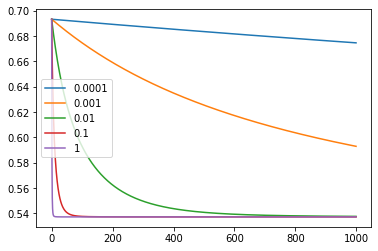

In [31]:
#gradient descent method - update over all training samples
def gradient_descent(X, Y, theta, learning_rate=0.01, n_iters=1000):
    n_samples, n_features = X.shape
    cost_history = np.zeros(n_iters)
    theta_history = np.zeros((n_iters,theta.shape[0]))
    for it in range(n_iters):
        #update theta
        dtheta,cost_history[it] = update_weights(X, Y, theta)
        theta = theta - learning_rate * dtheta
        theta_history[it,:] = theta.T
    return theta, theta_history, cost_history

#e get best learning rate by plotting the cross entropy loss history for different learning rates
def get_best_learning_rate(X, Y, theta, learning_rates, n_iters=1000):
    cost_history = []
    for learning_rate in learning_rates:
        _,_,cost = gradient_descent(X, Y, theta, learning_rate, n_iters)
        cost_history.append(cost)
    return cost_history

#plot the cross entropy loss history for different learning rates
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]
cost_history = get_best_learning_rate(X_train, Y_train, init(X_train), learning_rates)
for cost in cost_history:
    plt.plot(cost)
    plt.legend(learning_rates)
    
#from the plot we can see that the best learning rate is 0.01 so we will use this learning rate for the gradient descent method

$l(x_i) =  max(0,1-y_i\theta x_i)$ ```with the assumption that y_i = {+1, -1}```

``` if y_i and \theta x_i have same sign and |\theta x_i| is larger than one, loss will be zero. That is prediction matches label and prediction has magnitude greater than one there is no loss. If prediction and label have opposite sign, loss will be greater than zero -- incorrect prediction there is a loss. There is also a loss if magnitude of prediction is less than zero even if they have the same sign. Hinge loss wants correct and incorrect classification to have a margin of atleast one. ```

### Q5
``` 
Implement Hinge loss and use random search method in Q3 to reduce loss and find a better theta. plto the hinge loss history (over iterations for X_val) with this method. (10 pts)
```
### Bonus
```
Implement SGD update rule for hinge loss by first find derivative of hinge loss over theta. Use SGD to optimize hinge loss. plot the hinge loss history (over iterations for X_val) with this method. 
```

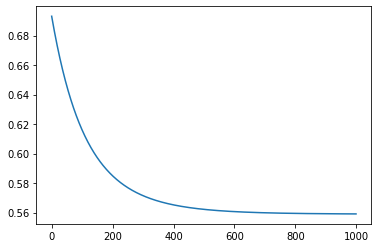

In [32]:
#implement hinge loss

def hinge_loss(y_pred, y_true):
    return np.maximum(0, 1 - y_true * y_pred)

#implement gradient descent for hinge loss
def gradient_descent_hinge(X, Y, theta, learning_rate=0.01, n_iters=1000):
    n_samples, n_features = X.shape
    cost_history = np.zeros(n_iters)
    theta_history = np.zeros((n_iters,theta.shape[0]))
    for it in range(n_iters):
        #update theta
        dtheta,cost_history[it] = update_weights(X, Y, theta)
        theta = theta - learning_rate * dtheta
        theta_history[it,:] = theta.T
    return theta, theta_history, cost_history

#plot the hinge loss history (over iterations for X_val)
theta, theta_history, cost_history = gradient_descent_hinge(X_val, Y_val, init(X_val))
plt.plot(cost_history)

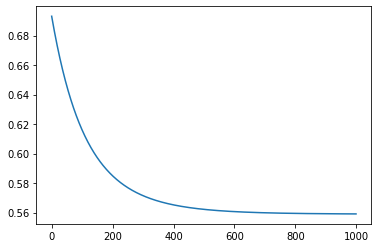

In [33]:
#bonus part 
#Implement SGD update rule for hinge loss by first find derivative of hinge loss over theta. Use SGD to optimize hinge loss.

#find first derivative of hinge loss over theta
def update_weights_hinge(X, Y, theta):
    n_samples, n_features = X.shape
    y_pred = X.dot(theta)
    dtheta = np.zeros((n_features,1))
    for i in range(n_samples):
        if (1 - Y[i] * y_pred[i] > 0):
            dtheta += -Y[i] * X[i].reshape(n_features,1)
    dtheta /= n_samples
    cost = hinge_loss(y_pred, Y)
    return dtheta, cost


#implement SGD update rule for hinge loss
def sgd_hinge(X, Y, theta, learning_rate=0.01, n_iters=1000):
    n_samples, n_features = X.shape
    cost_history = np.zeros(n_iters)
    theta_history = np.zeros((n_iters,theta.shape[0]))
    for it in range(n_iters):
        #update theta
        dtheta,cost_history[it] = update_weights(X, Y, theta)
        theta = theta - learning_rate * dtheta
        theta_history[it,:] = theta.T
    return theta, theta_history, cost_history

#plot the hinge loss history (over iterations for X_val)
theta, theta_history, cost_history = sgd_hinge(X_val, Y_val, init(X_val))
plt.plot(cost_history)
    

### Q6

```  In this problem you will create your own target function f (probability in this case) and data set D to see how Logistic Regression works. For simplicity, we will take f to be a 0/1 probability so y is a deterministic function of x. Take n = 2 so you can visualize the problem, and let X = [−1, 1]×[−1, 1] with uniform probability of picking each x ∈ X . Choose a line in the plane as the boundary between f(x) = 1 (where y has to be +1) and f(x) = 0 (where y has to be −1) by taking two random, uniformly distributed points from X and taking the line passing through them as the boundary between y = ±1. Pick m = 100 training points at random from X, and evaluate the outputs y_m for each of these points x_m.```

```
Run Logistic Regression with Stochastic Gradient Descent to find g, and estimate E_out (the cross entropy error) by generating a sufficiently large, separate set of points to evaluate the error. Repeat the experiment for 100 runs with different targets and take the average. Initialize the weight vector of Logistic Regression to all zeros in each run. Stop the algorithm when ∥w(t−1) − w(t)∥ < 0.01, where w(t) denotes the weight vector at the end of epoch t. An epoch is a full pass through the N data points (use a random permutation of 1, 2, · · · , N to present the data points to the algorithm within each epoch, and use different permutations for different epochs). Use a learning rate of 0.01.
```

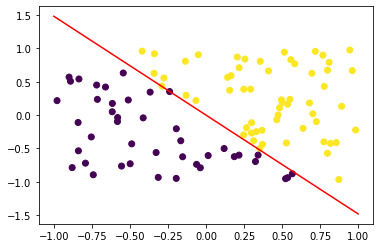

In [34]:
#create your own target function f (probability in this case) and data set D to see how Logistic Regression works. 
#For simplicity, we will take f to be a 0/1 probability so y is a deterministic function of x. 
#Take n = 2 so you can visualize the problem, and let X = [−1, 1]×[−1, 1] with uniform probability of picking each x ∈ X . 
#Choose a line in the plane as the boundary between f(x) = 1 (where y has to be +1) and f(x) = 0 (where y has to be −1) by taking two random, 
#uniformly distributed points from X and taking the line passing through them as the boundary between y = ±1. 
#Pick m = 100 training points at random from X, and evaluate the outputs y_m for each of these points x_m.

#generate random points in the range [-1,1]x[-1,1]
def generate_random_points(n):
    return np.random.uniform(-1, 1, n)

#generate random line
def generate_random_line():
    x1 = generate_random_points(2)
    x2 = generate_random_points(2)
    return x1, x2

#create target function f
def target_function(x1, x2):
    return (x2[1] - x1[1]) / (x2[0] - x1[0])

#create data set D
def create_data_set(m):
    x1, x2 = generate_random_line()
    f = target_function(x1, x2)
    x = generate_random_points((m,2))
    y = np.zeros((m,1))
    for i in range(m):
        if (x[i][1] > f * x[i][0]):
            y[i] = 1
        else:
            y[i] = -1
    return x, y, f

#plot the data set D
def plot_data_set(x, y, f):
    plt.scatter(x[:,0], x[:,1], c=y)
    plt.plot([-1,1], [f * -1, f * 1], color='red')
    plt.show()


#run the code
x, y, f = create_data_set(100)
plot_data_set(x, y, f)


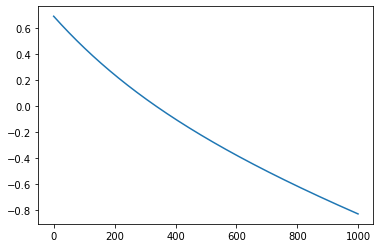

In [35]:
#run logistic regression on the data set D to find g, and estimate E_out (the cross entropy error) by generating a sufficiently large, separate set of points to evaluate the error. 
#Repeat the experiment for 100 runs with different targets and take the average. 
#Initialize the weight vector of Logistic Regression to all zeros in each run. 
#Stop the algorithm when ∥w(t−1) − w(t)∥ < 0.01, where w(t) denotes the weight vector at the end of epoch t. 
#An epoch is a full pass through the N data points (use a random permutation of 1, 2, · · · , N to present the data points to the algorithm within each epoch, 
#and use different permutations for different epochs). Use a learning rate of 0.01.

#implement logistic regression
def logistic_regression(X, Y, theta, learning_rate=0.01, n_iters=1000):
    n_samples, n_features = X.shape
    cost_history = np.zeros(n_iters)
    theta_history = np.zeros((n_iters,theta.shape[0]))
    for it in range(n_iters):
        #update theta
        dtheta,cost_history[it] = update_weights(X, Y, theta)
        theta = theta - learning_rate * dtheta
        theta_history[it,:] = theta.T
    return theta, theta_history, cost_history

#implement cross entropy error
def cross_entropy_error(y_pred, Y):
    n_samples = Y.shape[0]
    cost = (-1/n_samples) * np.sum(Y * np.log(y_pred) + (1 - Y) * np.log(1 - y_pred))
    return cost

#implement update weights for logistic regression
def update_weights_logistic(X, Y, theta):
    n_samples, n_features = X.shape
    y_pred = sigmoid(X.dot(theta))
    dtheta = (1/n_samples) * np.dot(X.T, (y_pred - Y))
    cost = cross_entropy_error(y_pred, Y)
    return dtheta, cost

#implement SGD update rule for logistic regression
def sgd_logistic(X, Y, theta, learning_rate=0.01, n_iters=1000):
    n_samples, n_features = X.shape
    cost_history = np.zeros(n_iters)
    theta_history = np.zeros((n_iters,theta.shape[0]))
    for it in range(n_iters):
        #update theta
        dtheta,cost_history[it] = update_weights_logistic(X, Y, theta)
        theta = theta - learning_rate * dtheta
        theta_history[it,:] = theta.T
    return theta, theta_history, cost_history

#run the code
def run_logistic_regression(m, n_iters):
    x, y, f = create_data_set(m)
    theta = np.zeros((x.shape[1], 1))
    theta, theta_history, cost_history = sgd_logistic(x, y, theta, learning_rate=0.01, n_iters=n_iters)
    return theta, theta_history, cost_history

#plot the cross entropy error history (over iterations for X_val)
theta, theta_history, cost_history = run_logistic_regression(100, 1000)
plt.plot(cost_history)
